In [56]:
from keras_vggface.vggface import VGGFace
import tensorflow.python.keras.engine
import keras
import tensorflow as tf
from keras_vggface import utils
from keras_vggface.utils import preprocess_input
from keras.layers import Input
import cv2
import pandas as pd
import numpy as np 
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [1]:
import os
os.chdir("C:/Users/u526074/Documents/thesis/Important_data")
os.getcwd()


'C:\\Users\\u526074\\Documents\\thesis\\Important_data'

In [57]:
os.chdir("C:/Users/u526074/Documents/thesis/Important_data")
os.getcwd()

df = pd.read_csv("total_data.csv", sep = ";")
train = []
count = 0
for index in range(len(df)):
    row =df.loc[count]
    vvr = row.iloc[2]
    vid_name = row.iloc[7]
    if vvr >= 11:
        x =1
    else:
        x = 0
    train.append([vid_name,x])
    count+=1


train_df = pd.DataFrame(train, columns = ['Name', 'score'])



In [58]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 50

MAX_SEQ_LENGTH = 226
NUM_FEATURES = 2048

In [59]:
def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    os.chdir("C:/Users/u526074/Documents/thesis/Important_data/Augmented_videos")
    os.getcwd()
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [ ]:

X_train = []
for vid,y in train:
    x = load_video(vid)
    X_train.append(x)
    
y_train = []

for vid,y in train:
    y_train.append(y)



In [ ]:
def build_feature_extractor():
    feature_extractor = VGGFace(model='senet50', include_top=False, pooling='max' , input_shape=(IMG_SIZE, IMG_SIZE, 3), )
    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    outputs = feature_extractor(inputs)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()


def prepare_all_videos(x,y):
    count = 0
    num_samples = len(y)
    videos = x
    labels = y
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float64"
    )
    for idx, frame in enumerate(videos):
        # Gather all its frames and add a batch dimension.
        frames = frame.astype("float64")
        frames = preprocess_input(frames, version=2)
        frames = frames[None, ...]
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float64"
        )
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            print(frames.shape)
            print(count)
            count += 1
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                batch[None, j, :]
                )
        frame_features[idx,] = temp_frame_features.squeeze()
    return frame_features, labels

train_data, train_labels = prepare_all_videos(X_train, y_train) ;



In [ ]:
nsamples, nx, ny = train_data.shape
d2_train_dataset = train_data.reshape((nsamples,nx*ny))
d2_train_dataset.shape

sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(d2_train_dataset, train_labels)

X_train_aug, y_train_aug = X_smote.reshape((len(X_smote),226,2048)), y_smote


In [ ]:
X_trainn, X_vall, y_trainn, y_vall = train_test_split(X_train_aug, y_train_aug, test_size=0.25, random_state=42)

X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_trainn, y_trainn, test_size=0.20, random_state=42)


In [5]:
 def roccurve(y_val, X_val):
    ns_probs = [0 for _ in range(len(y_val))]
    lr_probs = rnn_model_1.predict(X_val)
    ns_auc = roc_auc_score(y_val, ns_probs)
    lr_auc = roc_auc_score(y_val, lr_probs)
    print('No Skill: AUC=%.3f' % (ns_auc))
    print('CNN: AUC=%.3f' % (lr_auc))
    ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='CNN-GRU')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()
    

# Brownlee, J (2021) How to Use ROC Curves and Precision-Recall Curves for Classification in Python [Source Code]. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/.


----------------
Model: , hidden_layers: 8 , dropout: 0.1 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.6760 - accuracy: 0.5730
Epoch 00001: val_loss improved from inf to 0.62109, saving model to video_classifier
34/34 [==============================] - 20s 480ms/step - loss: 0.6760 - accuracy: 0.5730 - val_loss: 0.6211 - val_accuracy: 0.6719
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6134 - accuracy: 0.6601
Epoch 00002: val_loss did not improve from 0.62109
34/34 [==============================] - 8s 247ms/step - loss: 0.6134 - accuracy: 0.6601 - val_loss: 0.6224 - val_accuracy: 0.6539
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.5844 - accuracy: 0.6910
Epoch 00003: val_loss improved from 0.62109 to 0.60073, saving model to video_classifier
34/34 [==============================] - 9s 277ms/step - loss: 0.5844 - accuracy: 0.6910 - val_loss: 0.6007 - val_accuracy: 0.6652
Epoch 4/

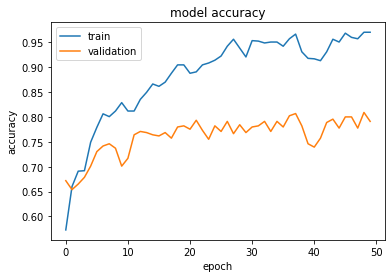

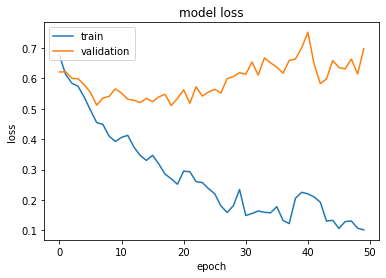

No Skill: AUC=0.500
CNN: AUC=0.863


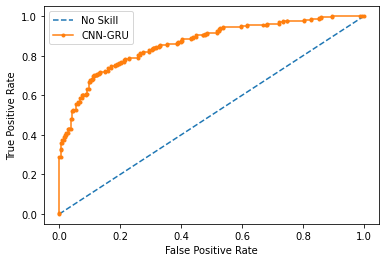

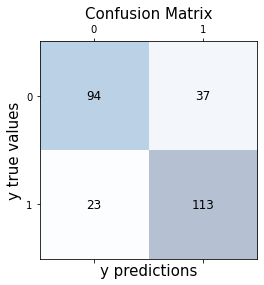

No Skill: AUC=0.500
CNN: AUC=0.823


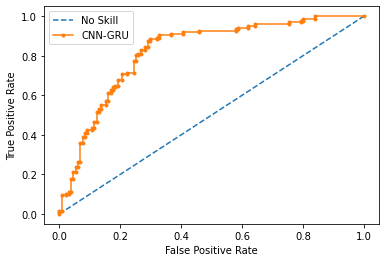

specificity: 0.7176 sensitivity: 0.8309 f1 score: 0.7902
Test accuracy: (0.5630684494972229, 0.7752808928489685)
8 & 0.1 & 0.001 & 50 & 0.2198 & 0.9213 & 0.5111 & 0.7798
----------------
Model: , hidden_layers: 8 , dropout: 0.25 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5571
Epoch 00001: val_loss improved from inf to 0.64815, saving model to video_classifier
34/34 [==============================] - 15s 341ms/step - loss: 0.6933 - accuracy: 0.5571 - val_loss: 0.6482 - val_accuracy: 0.6180
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6462 - accuracy: 0.6170
Epoch 00002: val_loss improved from 0.64815 to 0.63965, saving model to video_classifier
34/34 [==============================] - 12s 342ms/step - loss: 0.6462 - accuracy: 0.6170 - val_loss: 0.6397 - val_accuracy: 0.6472
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6353 - accuracy: 0.6339
Epoch 00003: val_l

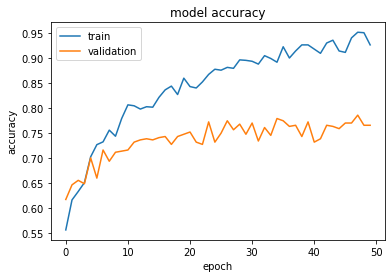

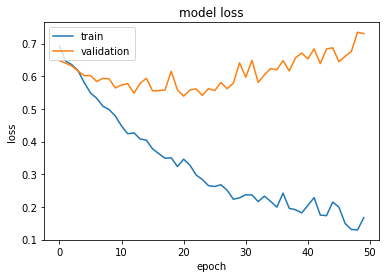

No Skill: AUC=0.500
CNN: AUC=0.835


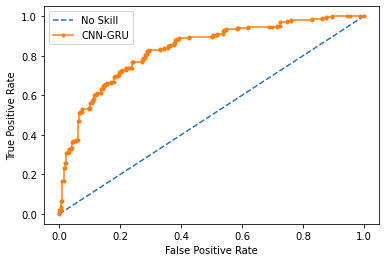

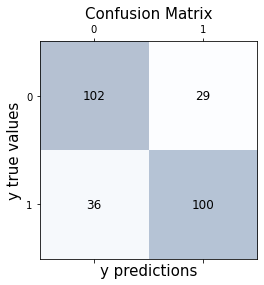

No Skill: AUC=0.500
CNN: AUC=0.827


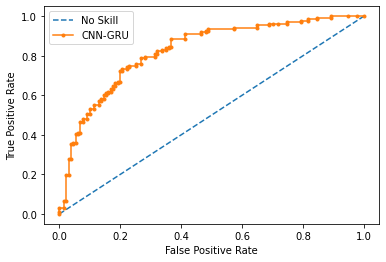

specificity: 0.7786 sensitivity: 0.7353 f1 score: 0.7547
Test accuracy: (0.5522523522377014, 0.7565543055534363)
8 & 0.25 & 0.001 & 50 & 0.2916 & 0.8642 & 0.5391 & 0.7528
----------------
Model: , hidden_layers: 8 , dropout: 0.5 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7042 - accuracy: 0.5403
Epoch 00001: val_loss improved from inf to 0.66024, saving model to video_classifier
34/34 [==============================] - 13s 295ms/step - loss: 0.7042 - accuracy: 0.5403 - val_loss: 0.6602 - val_accuracy: 0.6315
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6688 - accuracy: 0.6011
Epoch 00002: val_loss improved from 0.66024 to 0.64740, saving model to video_classifier
34/34 [==============================] - 8s 246ms/step - loss: 0.6688 - accuracy: 0.6011 - val_loss: 0.6474 - val_accuracy: 0.6292
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6437 - accuracy: 0.6442
Epoch 00003: val_lo

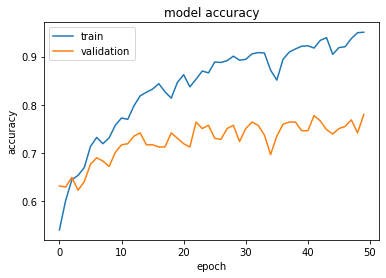

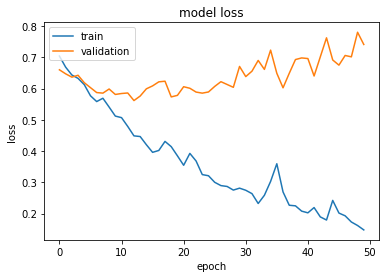

No Skill: AUC=0.500
CNN: AUC=0.798


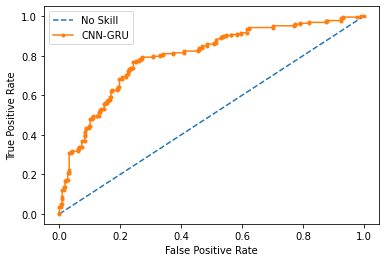

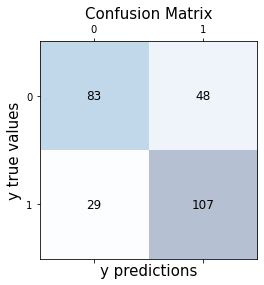

No Skill: AUC=0.500
CNN: AUC=0.776


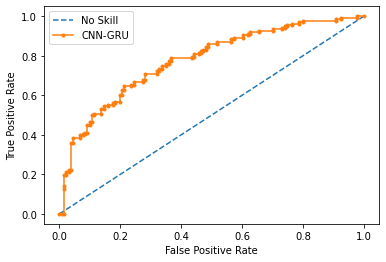

specificity: 0.6336 sensitivity: 0.7868 f1 score: 0.7354
Test accuracy: (0.5905719995498657, 0.7116104960441589)
8 & 0.5 & 0.001 & 50 & 0.3873 & 0.8277 & 0.5618 & 0.7348
----------------
Model: , hidden_layers: 8 , dropout: 0.1 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7672 - accuracy: 0.5028
Epoch 00001: val_loss improved from inf to 0.69937, saving model to video_classifier
34/34 [==============================] - 17s 298ms/step - loss: 0.7672 - accuracy: 0.5028 - val_loss: 0.6994 - val_accuracy: 0.5640
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6608 - accuracy: 0.5908
Epoch 00002: val_loss improved from 0.69937 to 0.64841, saving model to video_classifier
34/34 [==============================] - 10s 281ms/step - loss: 0.6608 - accuracy: 0.5908 - val_loss: 0.6484 - val_accuracy: 0.6000
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6144 - accuracy: 0.6545
Epoch 00003: val_l

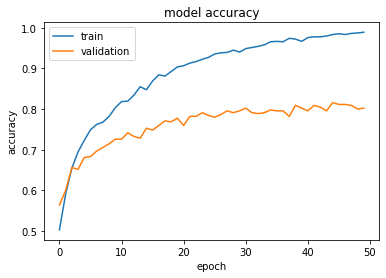

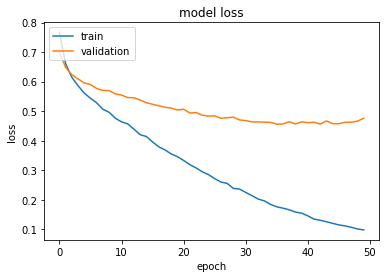

No Skill: AUC=0.500
CNN: AUC=0.874


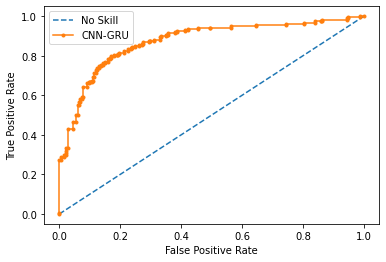

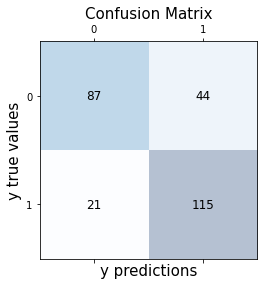

No Skill: AUC=0.500
CNN: AUC=0.818


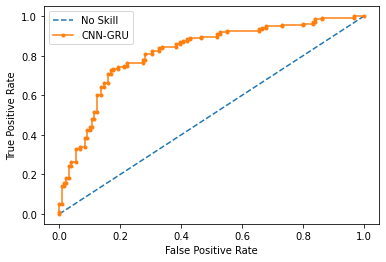

specificity: 0.6641 sensitivity: 0.8456 f1 score: 0.7797
Test accuracy: (0.5481298565864563, 0.7565543055534363)
8 & 0.1 & 0.0001 & 50 & 0.1637 & 0.97 & 0.4558 & 0.7955
----------------
Model: , hidden_layers: 8 , dropout: 0.25 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7397 - accuracy: 0.5037
Epoch 00001: val_loss improved from inf to 0.69048, saving model to video_classifier
34/34 [==============================] - 16s 357ms/step - loss: 0.7397 - accuracy: 0.5037 - val_loss: 0.6905 - val_accuracy: 0.5573
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5637
Epoch 00002: val_loss improved from 0.69048 to 0.66659, saving model to video_classifier
34/34 [==============================] - 9s 274ms/step - loss: 0.6924 - accuracy: 0.5637 - val_loss: 0.6666 - val_accuracy: 0.5933
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6558 - accuracy: 0.6142
Epoch 00003: val_lo

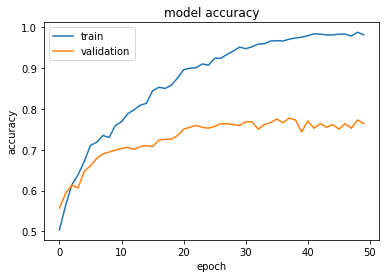

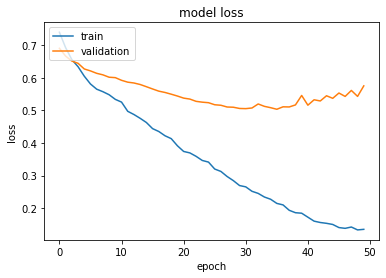

No Skill: AUC=0.500
CNN: AUC=0.839


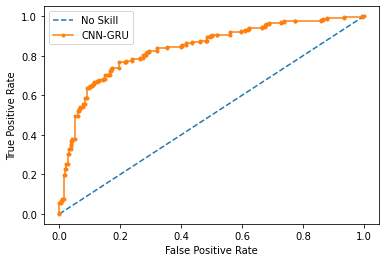

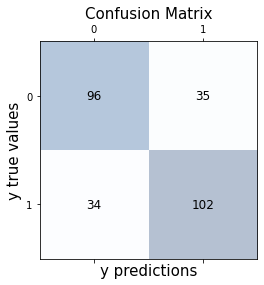

No Skill: AUC=0.500
CNN: AUC=0.821


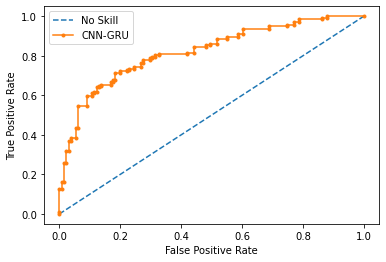

specificity: 0.7328 sensitivity: 0.75 f1 score: 0.7473
Test accuracy: (0.5327775478363037, 0.7415730357170105)
8 & 0.25 & 0.0001 & 50 & 0.1841 & 0.9794 & 0.5034 & 0.7753
----------------
Model: , hidden_layers: 8 , dropout: 0.5 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0.4963
Epoch 00001: val_loss improved from inf to 0.68860, saving model to video_classifier
34/34 [==============================] - 15s 356ms/step - loss: 0.7443 - accuracy: 0.4963 - val_loss: 0.6886 - val_accuracy: 0.5618
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.7221 - accuracy: 0.5393
Epoch 00002: val_loss improved from 0.68860 to 0.66405, saving model to video_classifier
34/34 [==============================] - 9s 267ms/step - loss: 0.7221 - accuracy: 0.5393 - val_loss: 0.6640 - val_accuracy: 0.6157
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.5534
Epoch 00003: val_lo

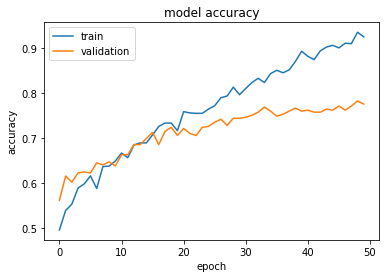

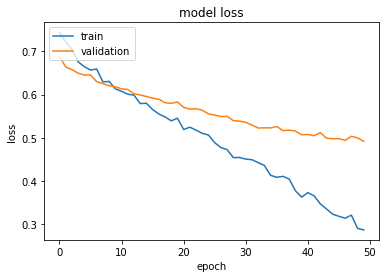

No Skill: AUC=0.500
CNN: AUC=0.848


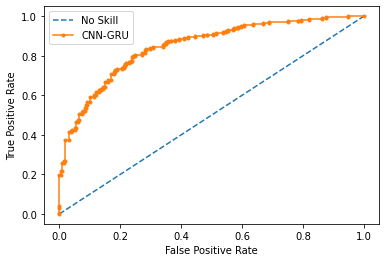

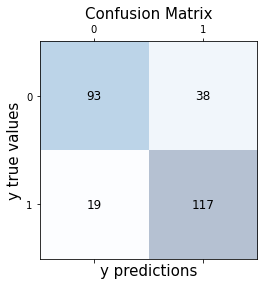

No Skill: AUC=0.500
CNN: AUC=0.845


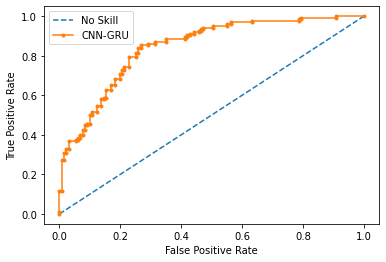

specificity: 0.7099 sensitivity: 0.8603 f1 score: 0.8041
Test accuracy: (0.48977139592170715, 0.7865168452262878)
8 & 0.5 & 0.0001 & 50 & 0.2378 & 0.9597 & 0.4918 & 0.7753
----------------
Model: , hidden_layers: 16 , dropout: 0.1 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.6757 - accuracy: 0.5880
Epoch 00001: val_loss improved from inf to 0.62431, saving model to video_classifier
34/34 [==============================] - 21s 326ms/step - loss: 0.6757 - accuracy: 0.5880 - val_loss: 0.6243 - val_accuracy: 0.6584
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6087 - accuracy: 0.6816
Epoch 00002: val_loss improved from 0.62431 to 0.59176, saving model to video_classifier
34/34 [==============================] - 9s 279ms/step - loss: 0.6087 - accuracy: 0.6816 - val_loss: 0.5918 - val_accuracy: 0.6854
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7200
Epoch 00003: val_

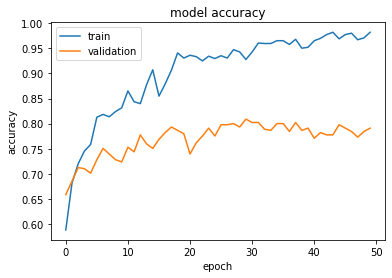

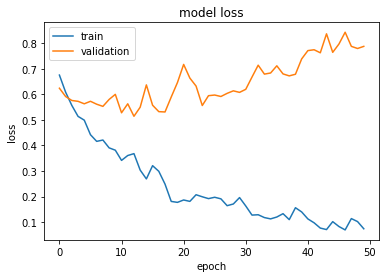

No Skill: AUC=0.500
CNN: AUC=0.838


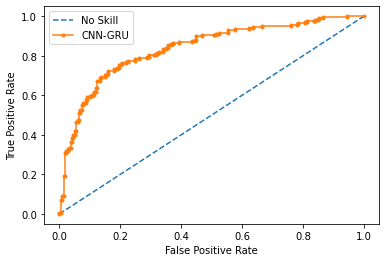

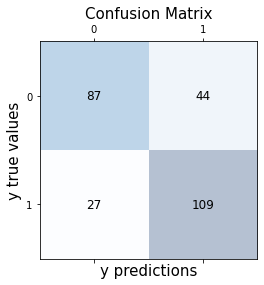

No Skill: AUC=0.500
CNN: AUC=0.802


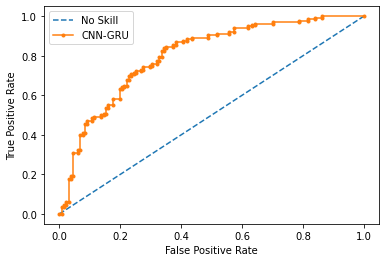

specificity: 0.6641 sensitivity: 0.8015 f1 score: 0.7543
Test accuracy: (0.5740121006965637, 0.7340824007987976)
16 & 0.1 & 0.001 & 50 & 0.2813 & 0.8979 & 0.5144 & 0.7775
----------------
Model: , hidden_layers: 16 , dropout: 0.25 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.6777 - accuracy: 0.5890
Epoch 00001: val_loss improved from inf to 0.64341, saving model to video_classifier
34/34 [==============================] - 16s 323ms/step - loss: 0.6777 - accuracy: 0.5890 - val_loss: 0.6434 - val_accuracy: 0.6472
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6170 - accuracy: 0.6610
Epoch 00002: val_loss improved from 0.64341 to 0.63287, saving model to video_classifier
34/34 [==============================] - 10s 303ms/step - loss: 0.6170 - accuracy: 0.6610 - val_loss: 0.6329 - val_accuracy: 0.6225
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.5836 - accuracy: 0.6891
Epoch 00003: val

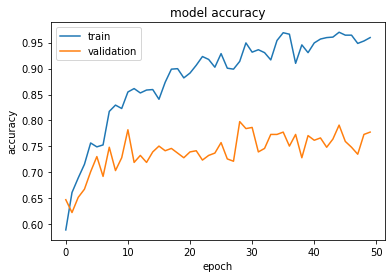

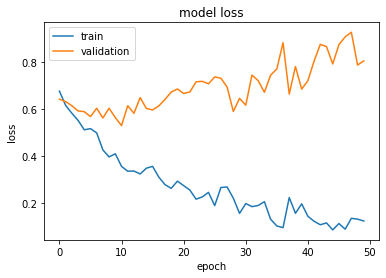

No Skill: AUC=0.500
CNN: AUC=0.830


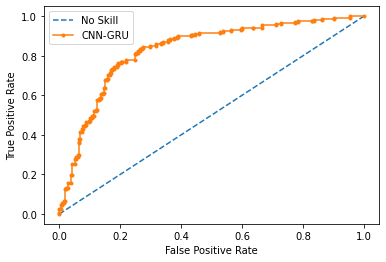

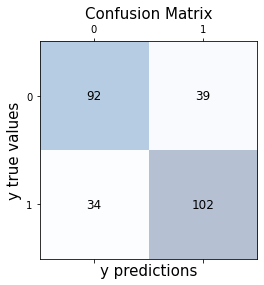

No Skill: AUC=0.500
CNN: AUC=0.789


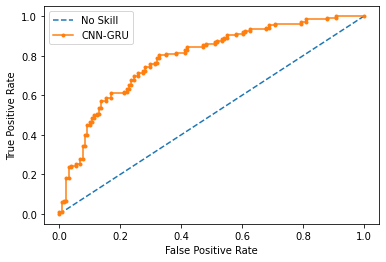

specificity: 0.7023 sensitivity: 0.75 f1 score: 0.7365
Test accuracy: (0.6046311259269714, 0.7265917658805847)
16 & 0.25 & 0.001 & 50 & 0.296 & 0.8858 & 0.5311 & 0.782
----------------
Model: , hidden_layers: 16 , dropout: 0.5 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7012 - accuracy: 0.5468
Epoch 00001: val_loss improved from inf to 0.70012, saving model to video_classifier
34/34 [==============================] - 17s 376ms/step - loss: 0.7012 - accuracy: 0.5468 - val_loss: 0.7001 - val_accuracy: 0.5034
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6590 - accuracy: 0.6152
Epoch 00002: val_loss improved from 0.70012 to 0.63673, saving model to video_classifier
34/34 [==============================] - 11s 337ms/step - loss: 0.6590 - accuracy: 0.6152 - val_loss: 0.6367 - val_accuracy: 0.6427
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6580 - accuracy: 0.6189
Epoch 00003: val_los

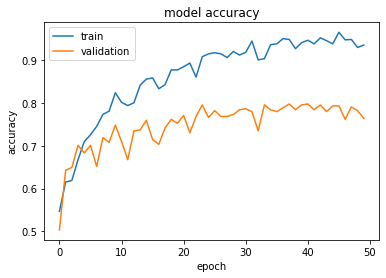

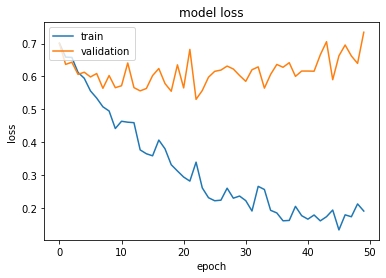

No Skill: AUC=0.500
CNN: AUC=0.840


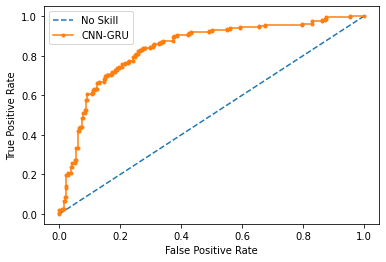

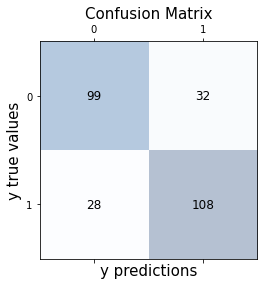

No Skill: AUC=0.500
CNN: AUC=0.813


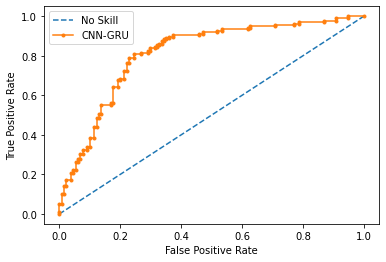

specificity: 0.7557 sensitivity: 0.7941 f1 score: 0.7826
Test accuracy: (0.5724274516105652, 0.7752808928489685)
16 & 0.5 & 0.001 & 50 & 0.2357 & 0.9148 & 0.5304 & 0.7685
----------------
Model: , hidden_layers: 16 , dropout: 0.1 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7147 - accuracy: 0.5478
Epoch 00001: val_loss improved from inf to 0.69041, saving model to video_classifier
34/34 [==============================] - 15s 358ms/step - loss: 0.7147 - accuracy: 0.5478 - val_loss: 0.6904 - val_accuracy: 0.5820
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.6245
Epoch 00002: val_loss improved from 0.69041 to 0.65792, saving model to video_classifier
34/34 [==============================] - 11s 320ms/step - loss: 0.6480 - accuracy: 0.6245 - val_loss: 0.6579 - val_accuracy: 0.6360
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.6751
Epoch 00003: val

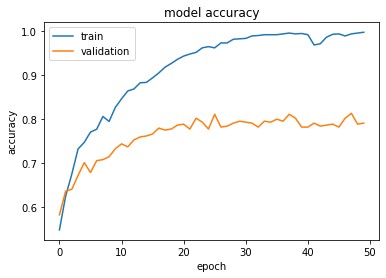

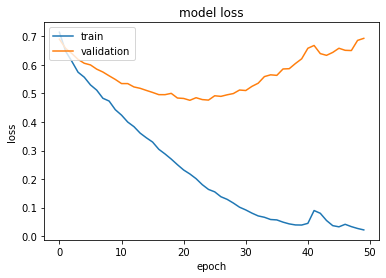

No Skill: AUC=0.500
CNN: AUC=0.854


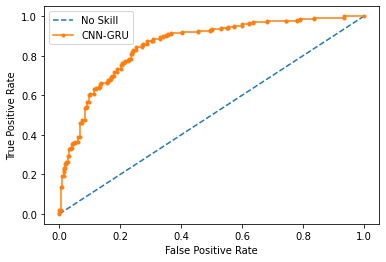

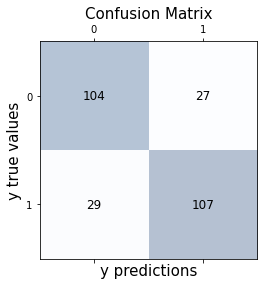

No Skill: AUC=0.500
CNN: AUC=0.809


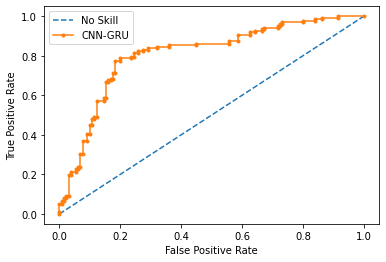

specificity: 0.7939 sensitivity: 0.7868 f1 score: 0.7926
Test accuracy: (0.5465796589851379, 0.7902621626853943)
16 & 0.1 & 0.0001 & 50 & 0.1936 & 0.9597 & 0.4761 & 0.7775
----------------
Model: , hidden_layers: 16 , dropout: 0.25 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7474 - accuracy: 0.5253
Epoch 00001: val_loss improved from inf to 0.67202, saving model to video_classifier
34/34 [==============================] - 21s 336ms/step - loss: 0.7474 - accuracy: 0.5253 - val_loss: 0.6720 - val_accuracy: 0.5730
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6537 - accuracy: 0.6236
Epoch 00002: val_loss improved from 0.67202 to 0.64376, saving model to video_classifier
34/34 [==============================] - 11s 324ms/step - loss: 0.6537 - accuracy: 0.6236 - val_loss: 0.6438 - val_accuracy: 0.6247
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6151 - accuracy: 0.6648
Epoch 00003: v

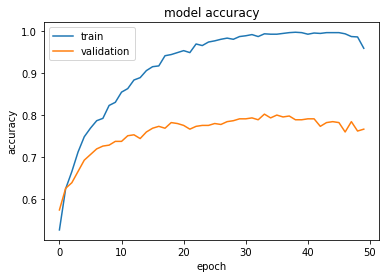

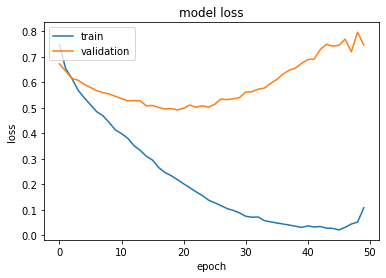

No Skill: AUC=0.500
CNN: AUC=0.849


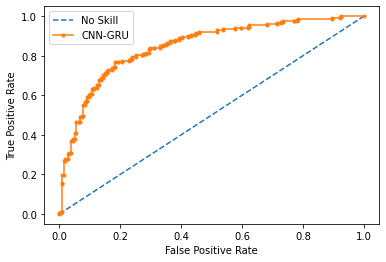

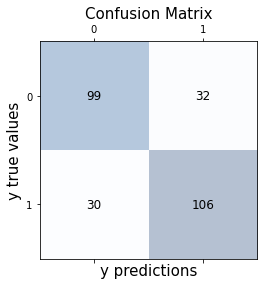

No Skill: AUC=0.500
CNN: AUC=0.821


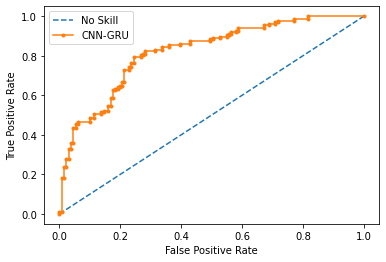

specificity: 0.7557 sensitivity: 0.7794 f1 score: 0.7737
Test accuracy: (0.5291035771369934, 0.7677902579307556)
16 & 0.25 & 0.0001 & 50 & 0.1858 & 0.9625 & 0.4916 & 0.7798
----------------
Model: , hidden_layers: 16 , dropout: 0.5 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7423 - accuracy: 0.5272
Epoch 00001: val_loss improved from inf to 0.67762, saving model to video_classifier
34/34 [==============================] - 20s 485ms/step - loss: 0.7423 - accuracy: 0.5272 - val_loss: 0.6776 - val_accuracy: 0.5798
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.7084 - accuracy: 0.5590
Epoch 00002: val_loss improved from 0.67762 to 0.65753, saving model to video_classifier
34/34 [==============================] - 11s 332ms/step - loss: 0.7084 - accuracy: 0.5590 - val_loss: 0.6575 - val_accuracy: 0.6090
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6798 - accuracy: 0.5833
Epoch 00003: v

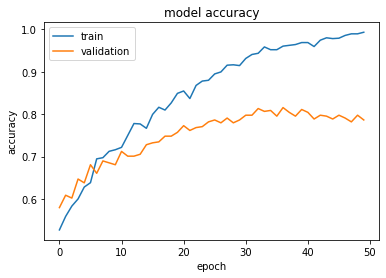

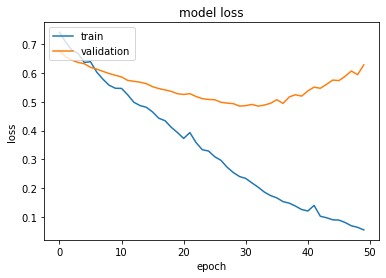

No Skill: AUC=0.500
CNN: AUC=0.855


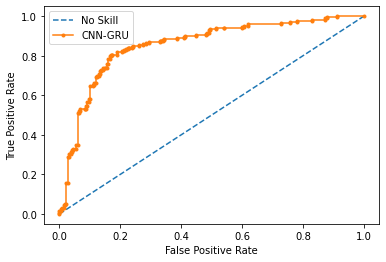

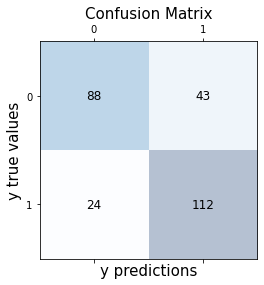

No Skill: AUC=0.500
CNN: AUC=0.826


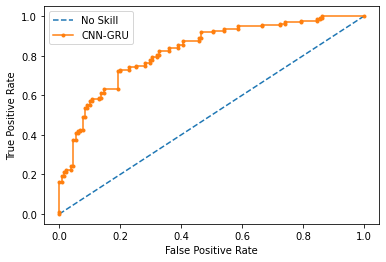

specificity: 0.6718 sensitivity: 0.8235 f1 score: 0.7698
Test accuracy: (0.5395882725715637, 0.7490636706352234)
16 & 0.5 & 0.0001 & 50 & 0.1603 & 0.9616 & 0.485 & 0.8135
----------------
Model: , hidden_layers: 32 , dropout: 0.1 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.6611 - accuracy: 0.6124
Epoch 00001: val_loss improved from inf to 0.63633, saving model to video_classifier
34/34 [==============================] - 17s 402ms/step - loss: 0.6611 - accuracy: 0.6124 - val_loss: 0.6363 - val_accuracy: 0.6517
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.5932 - accuracy: 0.6882
Epoch 00002: val_loss improved from 0.63633 to 0.59226, saving model to video_classifier
34/34 [==============================] - 13s 381ms/step - loss: 0.5932 - accuracy: 0.6882 - val_loss: 0.5923 - val_accuracy: 0.6921
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.5162 - accuracy: 0.7509
Epoch 00003: val_

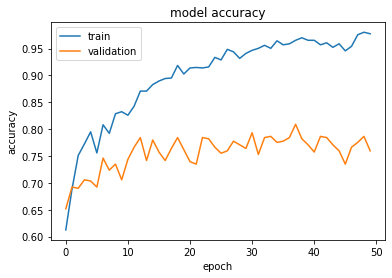

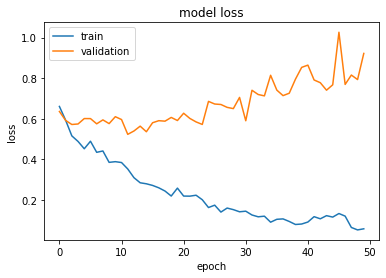

No Skill: AUC=0.500
CNN: AUC=0.841


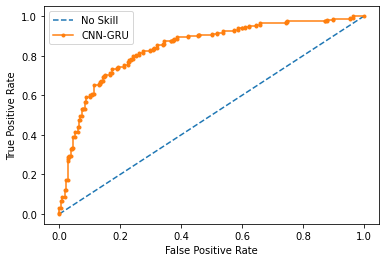

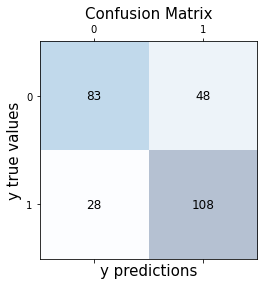

No Skill: AUC=0.500
CNN: AUC=0.793


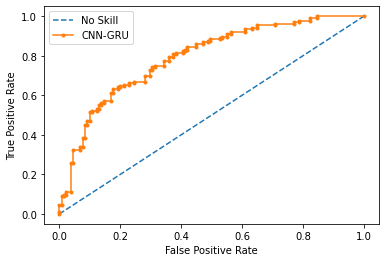

specificity: 0.6336 sensitivity: 0.7941 f1 score: 0.7397
Test accuracy: (0.6025971174240112, 0.7153558135032654)
32 & 0.1 & 0.001 & 50 & 0.2797 & 0.8895 & 0.5237 & 0.7663
----------------
Model: , hidden_layers: 32 , dropout: 0.25 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.5880
Epoch 00001: val_loss improved from inf to 0.63541, saving model to video_classifier
34/34 [==============================] - 18s 425ms/step - loss: 0.6789 - accuracy: 0.5880 - val_loss: 0.6354 - val_accuracy: 0.6427
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6265 - accuracy: 0.6358
Epoch 00002: val_loss improved from 0.63541 to 0.61117, saving model to video_classifier
34/34 [==============================] - 13s 374ms/step - loss: 0.6265 - accuracy: 0.6358 - val_loss: 0.6112 - val_accuracy: 0.6809
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.5552 - accuracy: 0.7247
Epoch 00003: val

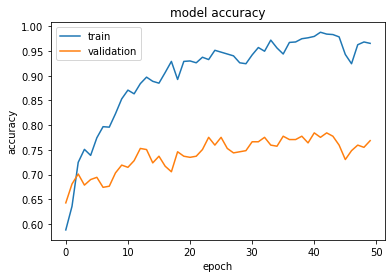

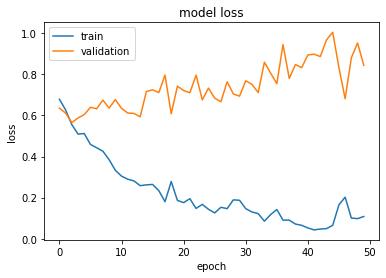

No Skill: AUC=0.500
CNN: AUC=0.778


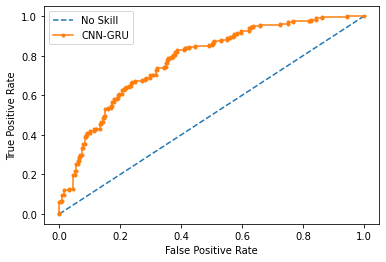

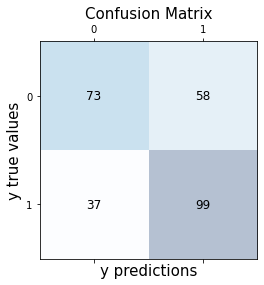

No Skill: AUC=0.500
CNN: AUC=0.731


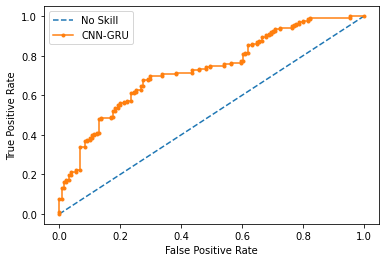

specificity: 0.5573 sensitivity: 0.7279 f1 score: 0.6758
Test accuracy: (0.6091811060905457, 0.6441947817802429)
32 & 0.25 & 0.001 & 50 & 0.4962 & 0.764 & 0.5654 & 0.7011
----------------
Model: , hidden_layers: 32 , dropout: 0.5 , learning rate: 0.001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7001 - accuracy: 0.5702
Epoch 00001: val_loss improved from inf to 0.62652, saving model to video_classifier
34/34 [==============================] - 19s 384ms/step - loss: 0.7001 - accuracy: 0.5702 - val_loss: 0.6265 - val_accuracy: 0.6674
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6415 - accuracy: 0.6358
Epoch 00002: val_loss did not improve from 0.62652
34/34 [==============================] - 12s 358ms/step - loss: 0.6415 - accuracy: 0.6358 - val_loss: 0.6280 - val_accuracy: 0.6337
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.6742
Epoch 00003: val_loss improved from 0.62652 to 0.62536,

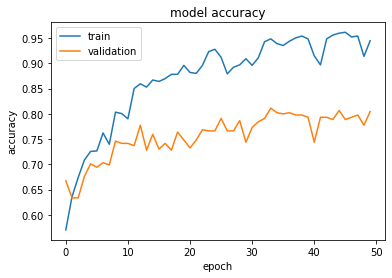

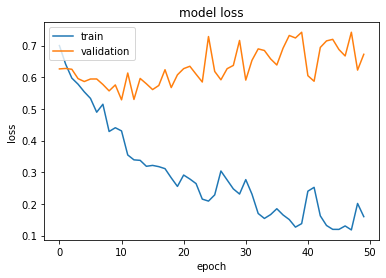

No Skill: AUC=0.500
CNN: AUC=0.829


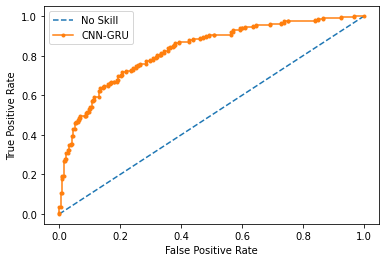

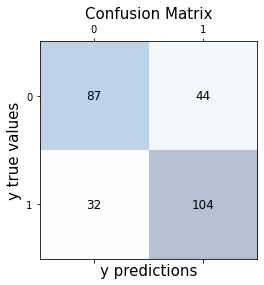

No Skill: AUC=0.500
CNN: AUC=0.814


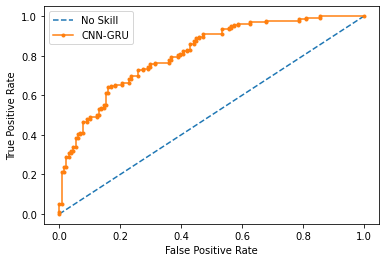

specificity: 0.6641 sensitivity: 0.7647 f1 score: 0.7324
Test accuracy: (0.5322359800338745, 0.7153558135032654)
32 & 0.5 & 0.001 & 50 & 0.3255 & 0.8642 & 0.5289 & 0.7416
----------------
Model: , hidden_layers: 32 , dropout: 0.1 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.5515
Epoch 00001: val_loss improved from inf to 0.65829, saving model to video_classifier
34/34 [==============================] - 20s 476ms/step - loss: 0.6819 - accuracy: 0.5515 - val_loss: 0.6583 - val_accuracy: 0.6247
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6085 - accuracy: 0.6863
Epoch 00002: val_loss improved from 0.65829 to 0.62824, saving model to video_classifier
34/34 [==============================] - 13s 379ms/step - loss: 0.6085 - accuracy: 0.6863 - val_loss: 0.6282 - val_accuracy: 0.6674
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.5563 - accuracy: 0.7388
Epoch 00003: val

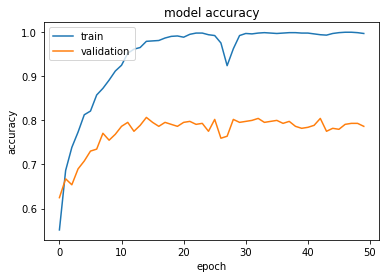

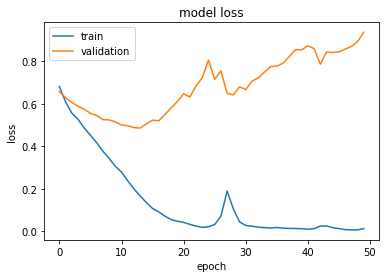

No Skill: AUC=0.500
CNN: AUC=0.857


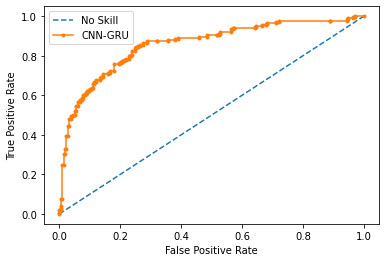

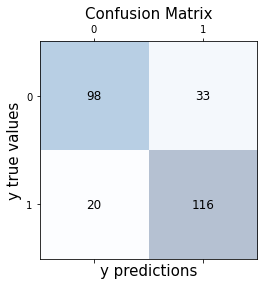

No Skill: AUC=0.500
CNN: AUC=0.877


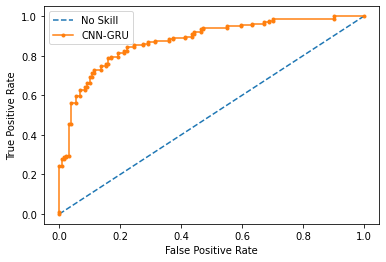

specificity: 0.7481 sensitivity: 0.8529 f1 score: 0.814
Test accuracy: (0.4471631646156311, 0.8014981150627136)
32 & 0.1 & 0.0001 & 50 & 0.135 & 0.9813 & 0.4858 & 0.7888
----------------
Model: , hidden_layers: 32 , dropout: 0.25 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.5730
Epoch 00001: val_loss improved from inf to 0.65376, saving model to video_classifier
34/34 [==============================] - 17s 418ms/step - loss: 0.6869 - accuracy: 0.5730 - val_loss: 0.6538 - val_accuracy: 0.5978
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6058 - accuracy: 0.6667
Epoch 00002: val_loss improved from 0.65376 to 0.62905, saving model to video_classifier
34/34 [==============================] - 12s 367ms/step - loss: 0.6058 - accuracy: 0.6667 - val_loss: 0.6290 - val_accuracy: 0.6270
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.5784 - accuracy: 0.7097
Epoch 00003: val

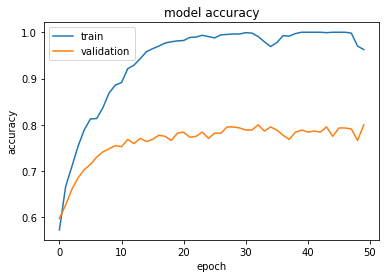

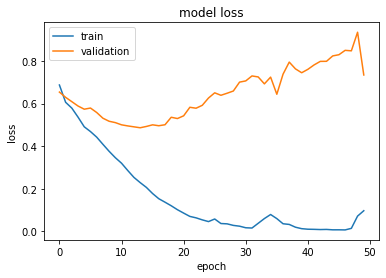

No Skill: AUC=0.500
CNN: AUC=0.852


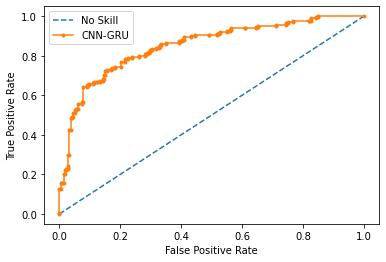

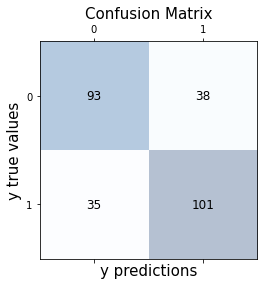

No Skill: AUC=0.500
CNN: AUC=0.804


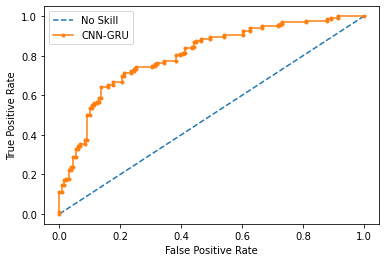

specificity: 0.7099 sensitivity: 0.7426 f1 score: 0.7345
Test accuracy: (0.5529057383537292, 0.7265917658805847)
32 & 0.25 & 0.0001 & 50 & 0.1939 & 0.9644 & 0.4862 & 0.7708
----------------
Model: , hidden_layers: 32 , dropout: 0.5 , learning rate: 0.0001 epochs 50
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.7268 - accuracy: 0.5581
Epoch 00001: val_loss improved from inf to 0.64844, saving model to video_classifier
34/34 [==============================] - 18s 430ms/step - loss: 0.7268 - accuracy: 0.5581 - val_loss: 0.6484 - val_accuracy: 0.6045
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.6710 - accuracy: 0.6311
Epoch 00002: val_loss improved from 0.64844 to 0.61800, saving model to video_classifier
34/34 [==============================] - 14s 404ms/step - loss: 0.6710 - accuracy: 0.6311 - val_loss: 0.6180 - val_accuracy: 0.6472
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.6091 - accuracy: 0.6564
Epoch 00003: v

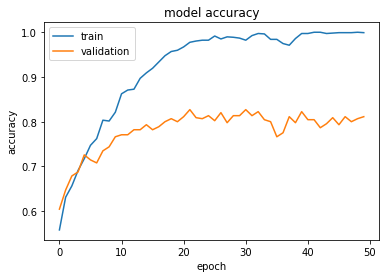

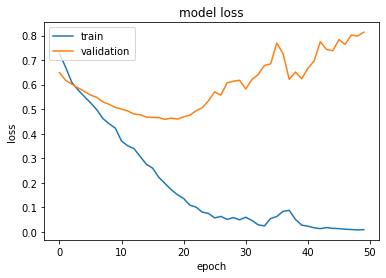

No Skill: AUC=0.500
CNN: AUC=0.871


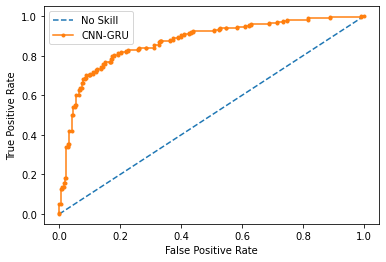

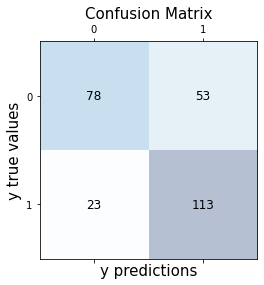

No Skill: AUC=0.500
CNN: AUC=0.825


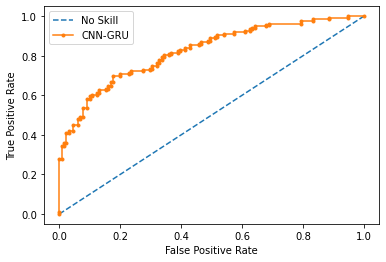

specificity: 0.5954 sensitivity: 0.8309 f1 score: 0.7483
Test accuracy: (0.5635156035423279, 0.7153558135032654)
32 & 0.5 & 0.0001 & 50 & 0.1578 & 0.9691 & 0.4586 & 0.8
----------------
Model: , hidden_layers: 8 , dropout: 0.1 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.5918
Epoch 00001: val_loss improved from inf to 0.64102, saving model to video_classifier
34/34 [==============================] - 19s 301ms/step - loss: 0.6819 - accuracy: 0.5918 - val_loss: 0.6410 - val_accuracy: 0.6315
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6130 - accuracy: 0.6713
Epoch 00002: val_loss improved from 0.64102 to 0.62284, saving model to video_classifier
34/34 [==============================] - 10s 290ms/step - loss: 0.6130 - accuracy: 0.6713 - val_loss: 0.6228 - val_accuracy: 0.6360
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.5867 - accuracy: 0.7013
Epoch 00003: val

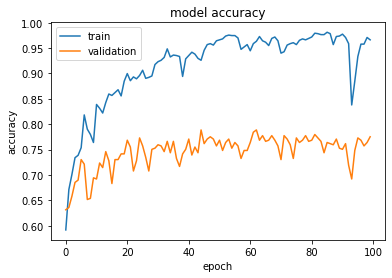

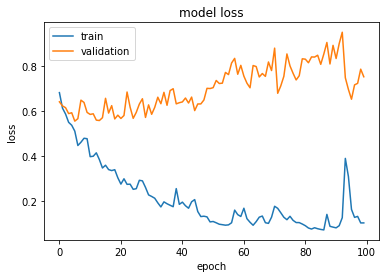

No Skill: AUC=0.500
CNN: AUC=0.799


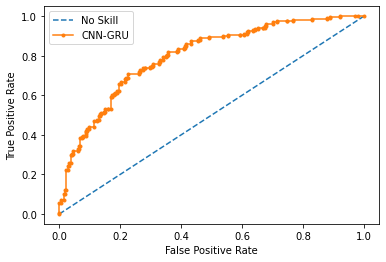

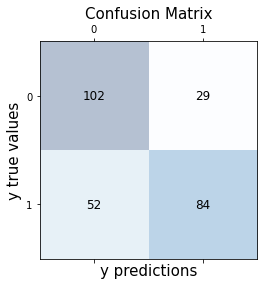

No Skill: AUC=0.500
CNN: AUC=0.744


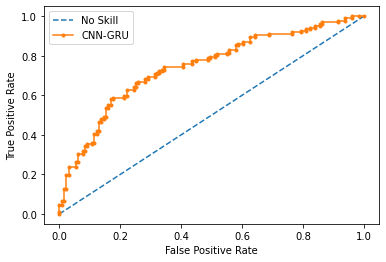

specificity: 0.7786 sensitivity: 0.6176 f1 score: 0.6747
Test accuracy: (0.6083574891090393, 0.6966292262077332)
8 & 0.1 & 0.001 & 100 & 0.4651 & 0.7893 & 0.5552 & 0.7303
----------------
Model: , hidden_layers: 8 , dropout: 0.25 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7021 - accuracy: 0.5459
Epoch 00001: val_loss improved from inf to 0.66371, saving model to video_classifier
34/34 [==============================] - 20s 480ms/step - loss: 0.7021 - accuracy: 0.5459 - val_loss: 0.6637 - val_accuracy: 0.6315
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6594 - accuracy: 0.6255
Epoch 00002: val_loss improved from 0.66371 to 0.64907, saving model to video_classifier
34/34 [==============================] - 10s 294ms/step - loss: 0.6594 - accuracy: 0.6255 - val_loss: 0.6491 - val_accuracy: 0.6315
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6450 - accuracy: 0.6330
Epoch 00003: 

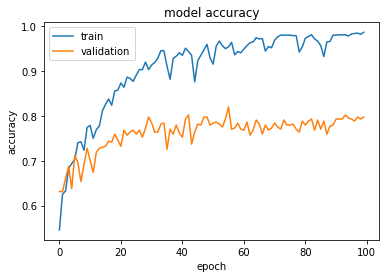

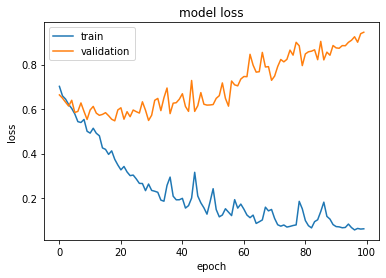

No Skill: AUC=0.500
CNN: AUC=0.819


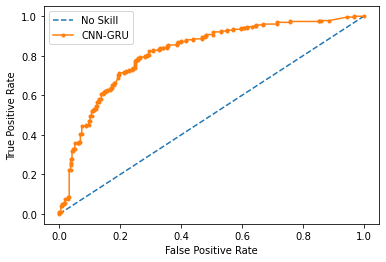

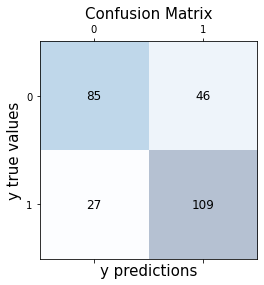

No Skill: AUC=0.500
CNN: AUC=0.790


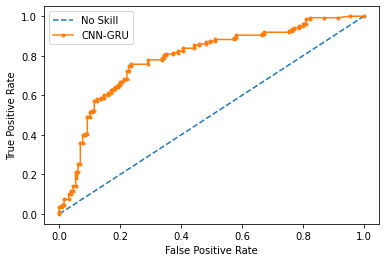

specificity: 0.6489 sensitivity: 0.8015 f1 score: 0.7491
Test accuracy: (0.5969969034194946, 0.7265917658805847)
8 & 0.25 & 0.001 & 100 & 0.3511 & 0.8586 & 0.5473 & 0.7596
----------------
Model: , hidden_layers: 8 , dropout: 0.5 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7274 - accuracy: 0.4963
Epoch 00001: val_loss improved from inf to 0.66429, saving model to video_classifier
34/34 [==============================] - 13s 310ms/step - loss: 0.7274 - accuracy: 0.4963 - val_loss: 0.6643 - val_accuracy: 0.6022
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6575 - accuracy: 0.6039
Epoch 00002: val_loss improved from 0.66429 to 0.64742, saving model to video_classifier
34/34 [==============================] - 10s 282ms/step - loss: 0.6575 - accuracy: 0.6039 - val_loss: 0.6474 - val_accuracy: 0.6719
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6437 - accuracy: 0.6152
Epoch 00003: 

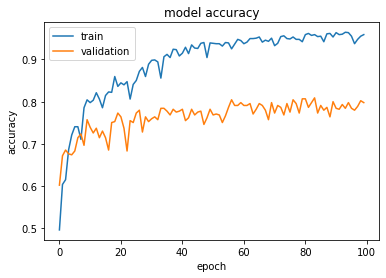

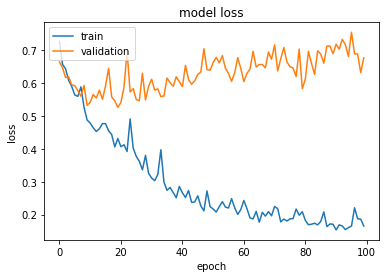

No Skill: AUC=0.500
CNN: AUC=0.836


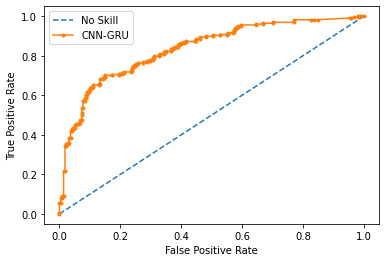

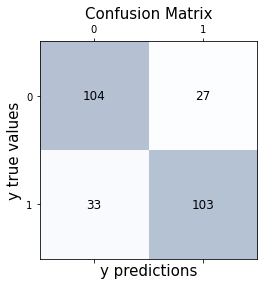

No Skill: AUC=0.500
CNN: AUC=0.822


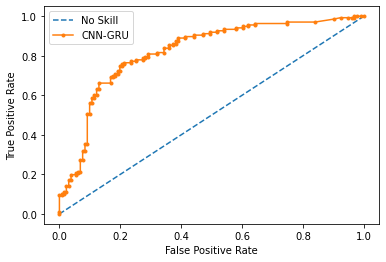

specificity: 0.7939 sensitivity: 0.7574 f1 score: 0.7744
Test accuracy: (0.5209127068519592, 0.7752808928489685)
8 & 0.5 & 0.001 & 100 & 0.3677 & 0.8521 & 0.5262 & 0.773
----------------
Model: , hidden_layers: 8 , dropout: 0.1 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7258 - accuracy: 0.5262
Epoch 00001: val_loss improved from inf to 0.68446, saving model to video_classifier
34/34 [==============================] - 14s 308ms/step - loss: 0.7258 - accuracy: 0.5262 - val_loss: 0.6845 - val_accuracy: 0.5685
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.6170
Epoch 00002: val_loss improved from 0.68446 to 0.64790, saving model to video_classifier
34/34 [==============================] - 10s 289ms/step - loss: 0.6480 - accuracy: 0.6170 - val_loss: 0.6479 - val_accuracy: 0.6270
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6073 - accuracy: 0.6685
Epoch 00003: v

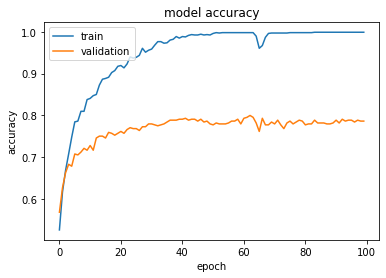

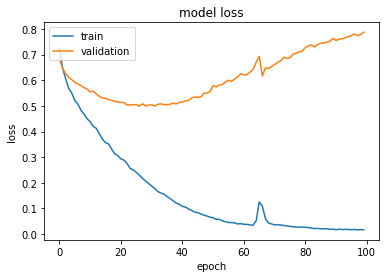

No Skill: AUC=0.500
CNN: AUC=0.839


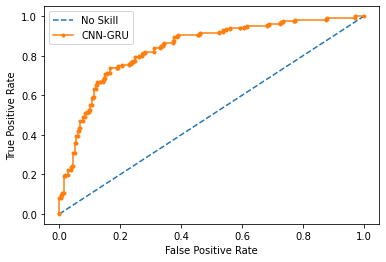

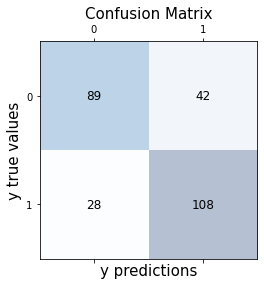

No Skill: AUC=0.500
CNN: AUC=0.805


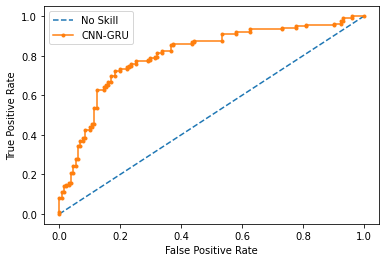

specificity: 0.6794 sensitivity: 0.7941 f1 score: 0.7552
Test accuracy: (0.557170569896698, 0.737827718257904)
8 & 0.1 & 0.0001 & 100 & 0.2088 & 0.9579 & 0.4991 & 0.764
----------------
Model: , hidden_layers: 8 , dropout: 0.25 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7264 - accuracy: 0.5169
Epoch 00001: val_loss improved from inf to 0.68783, saving model to video_classifier
34/34 [==============================] - 19s 306ms/step - loss: 0.7264 - accuracy: 0.5169 - val_loss: 0.6878 - val_accuracy: 0.5393
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.5721
Epoch 00002: val_loss improved from 0.68783 to 0.67523, saving model to video_classifier
34/34 [==============================] - 10s 296ms/step - loss: 0.6878 - accuracy: 0.5721 - val_loss: 0.6752 - val_accuracy: 0.5775
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6602 - accuracy: 0.6180
Epoch 00003: v

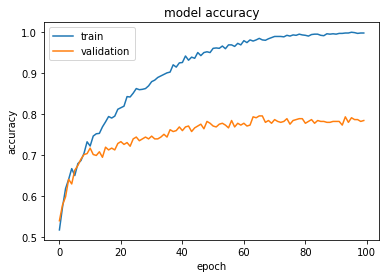

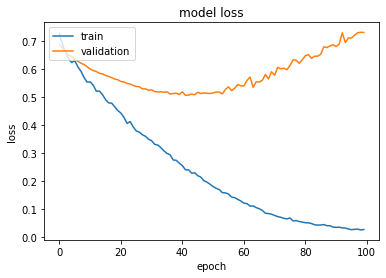

No Skill: AUC=0.500
CNN: AUC=0.839


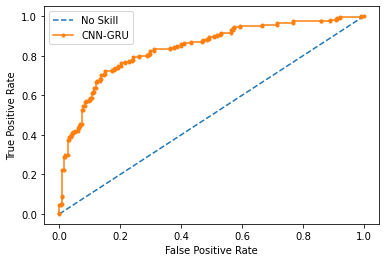

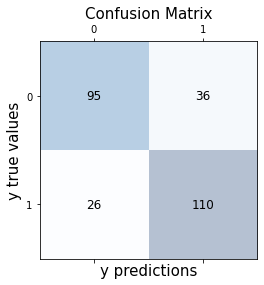

No Skill: AUC=0.500
CNN: AUC=0.827


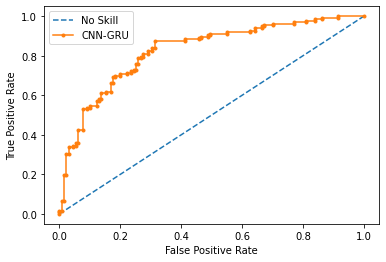

specificity: 0.7252 sensitivity: 0.8088 f1 score: 0.7801
Test accuracy: (0.5198171734809875, 0.7677902579307556)
8 & 0.25 & 0.0001 & 100 & 0.2151 & 0.956 & 0.507 & 0.7685
----------------
Model: , hidden_layers: 8 , dropout: 0.5 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7251 - accuracy: 0.5272
Epoch 00001: val_loss improved from inf to 0.67554, saving model to video_classifier
34/34 [==============================] - 17s 390ms/step - loss: 0.7251 - accuracy: 0.5272 - val_loss: 0.6755 - val_accuracy: 0.5955
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.5824
Epoch 00002: val_loss improved from 0.67554 to 0.65089, saving model to video_classifier
34/34 [==============================] - 10s 285ms/step - loss: 0.6880 - accuracy: 0.5824 - val_loss: 0.6509 - val_accuracy: 0.6337
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6601 - accuracy: 0.5936
Epoch 00003: 

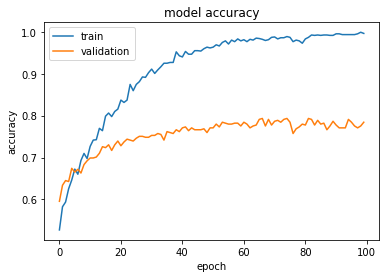

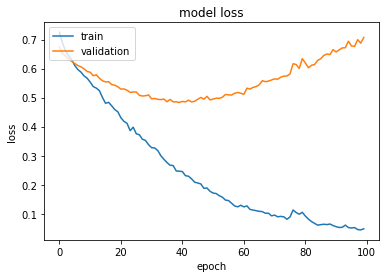

No Skill: AUC=0.500
CNN: AUC=0.850


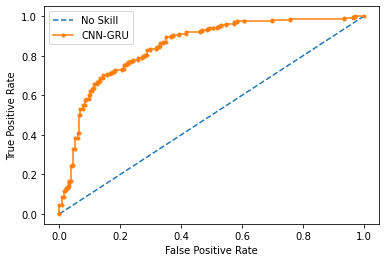

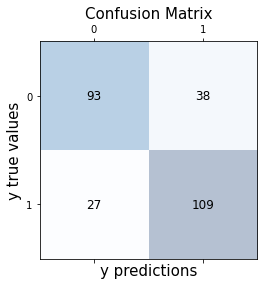

No Skill: AUC=0.500
CNN: AUC=0.818


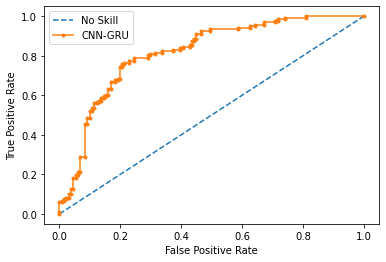

specificity: 0.7099 sensitivity: 0.8015 f1 score: 0.7703
Test accuracy: (0.5297250151634216, 0.7565543055534363)
8 & 0.5 & 0.0001 & 100 & 0.2017 & 0.9654 & 0.4834 & 0.7618
----------------
Model: , hidden_layers: 16 , dropout: 0.1 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.5712
Epoch 00001: val_loss improved from inf to 0.62246, saving model to video_classifier
34/34 [==============================] - 16s 363ms/step - loss: 0.6880 - accuracy: 0.5712 - val_loss: 0.6225 - val_accuracy: 0.6674
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6095 - accuracy: 0.6629
Epoch 00002: val_loss improved from 0.62246 to 0.59860, saving model to video_classifier
34/34 [==============================] - 11s 327ms/step - loss: 0.6095 - accuracy: 0.6629 - val_loss: 0.5986 - val_accuracy: 0.6854
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.5619 - accuracy: 0.6985
Epoch 00003:

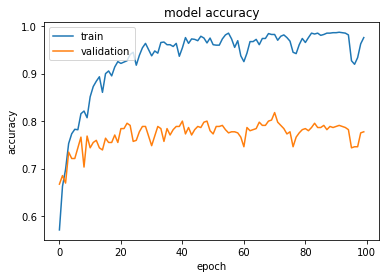

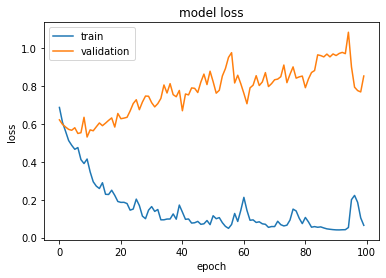

No Skill: AUC=0.500
CNN: AUC=0.825


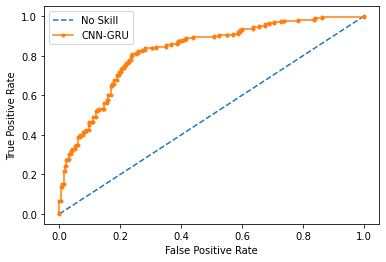

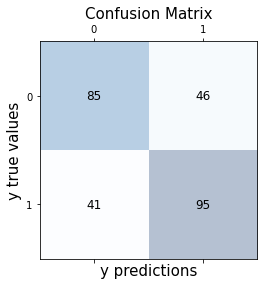

No Skill: AUC=0.500
CNN: AUC=0.752


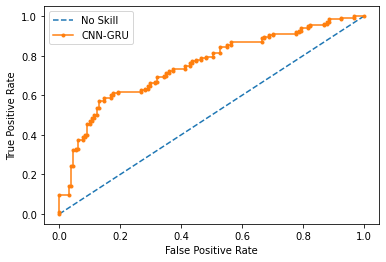

specificity: 0.6489 sensitivity: 0.6985 f1 score: 0.6859
Test accuracy: (0.6596853137016296, 0.6741573214530945)
16 & 0.1 & 0.001 & 100 & 0.3349 & 0.8446 & 0.5317 & 0.7685
----------------
Model: , hidden_layers: 16 , dropout: 0.25 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.6557 - accuracy: 0.6227
Epoch 00001: val_loss improved from inf to 0.63005, saving model to video_classifier
34/34 [==============================] - 16s 376ms/step - loss: 0.6557 - accuracy: 0.6227 - val_loss: 0.6301 - val_accuracy: 0.6360
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6288 - accuracy: 0.6451
Epoch 00002: val_loss improved from 0.63005 to 0.61322, saving model to video_classifier
34/34 [==============================] - 12s 342ms/step - loss: 0.6288 - accuracy: 0.6451 - val_loss: 0.6132 - val_accuracy: 0.6607
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.5822 - accuracy: 0.7051
Epoch 00003

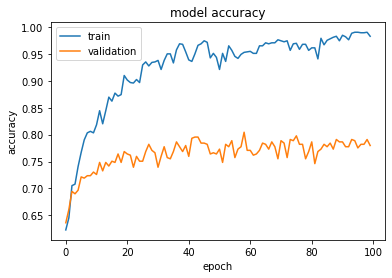

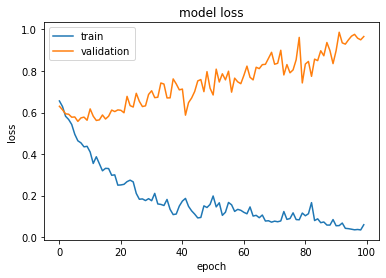

No Skill: AUC=0.500
CNN: AUC=0.792


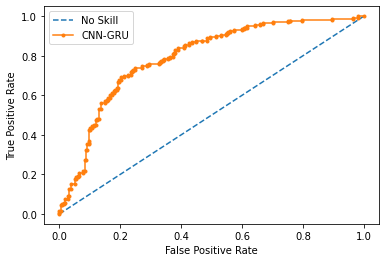

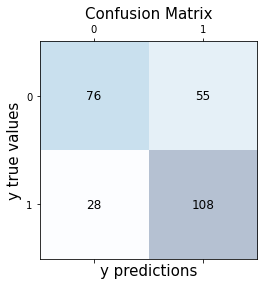

No Skill: AUC=0.500
CNN: AUC=0.735


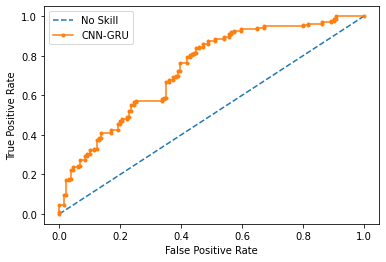

specificity: 0.5802 sensitivity: 0.7941 f1 score: 0.7224
Test accuracy: (0.6226457953453064, 0.6891385912895203)
16 & 0.25 & 0.001 & 100 & 0.3901 & 0.8315 & 0.5574 & 0.7191
----------------
Model: , hidden_layers: 16 , dropout: 0.5 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7287 - accuracy: 0.5300
Epoch 00001: val_loss improved from inf to 0.65378, saving model to video_classifier
34/34 [==============================] - 22s 387ms/step - loss: 0.7287 - accuracy: 0.5300 - val_loss: 0.6538 - val_accuracy: 0.6022
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6645 - accuracy: 0.5871
Epoch 00002: val_loss improved from 0.65378 to 0.64517, saving model to video_classifier
34/34 [==============================] - 12s 356ms/step - loss: 0.6645 - accuracy: 0.5871 - val_loss: 0.6452 - val_accuracy: 0.6337
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.6386
Epoch 00003

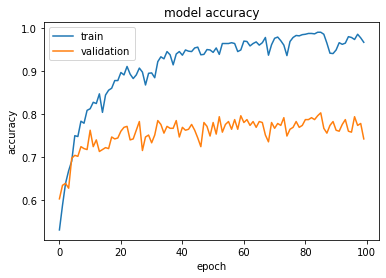

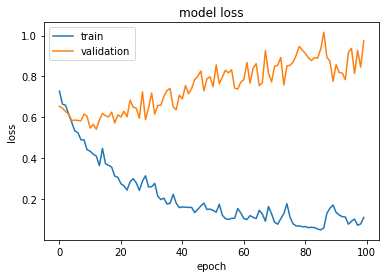

No Skill: AUC=0.500
CNN: AUC=0.820


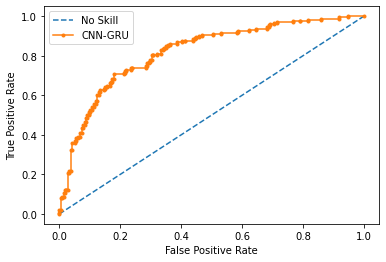

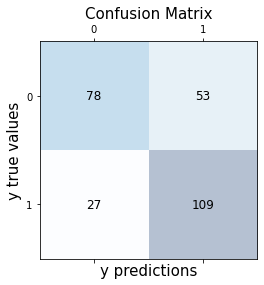

No Skill: AUC=0.500
CNN: AUC=0.770


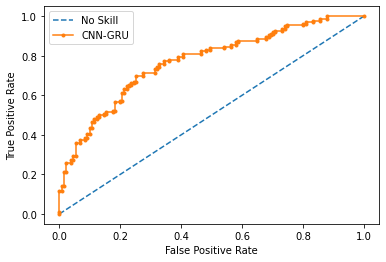

specificity: 0.5954 sensitivity: 0.8015 f1 score: 0.7315
Test accuracy: (0.6347377300262451, 0.7003745436668396)
16 & 0.5 & 0.001 & 100 & 0.3539 & 0.8586 & 0.5422 & 0.7393
----------------
Model: , hidden_layers: 16 , dropout: 0.1 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.5562
Epoch 00001: val_loss improved from inf to 0.65766, saving model to video_classifier
34/34 [==============================] - 22s 515ms/step - loss: 0.6839 - accuracy: 0.5562 - val_loss: 0.6577 - val_accuracy: 0.5843
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.6264
Epoch 00002: val_loss improved from 0.65766 to 0.63618, saving model to video_classifier
34/34 [==============================] - 13s 393ms/step - loss: 0.6490 - accuracy: 0.6264 - val_loss: 0.6362 - val_accuracy: 0.6225
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6231 - accuracy: 0.6704
Epoch 00003

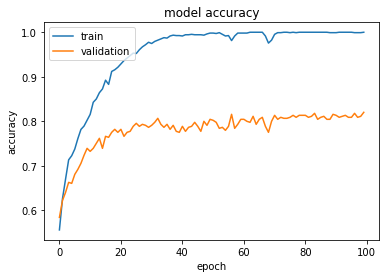

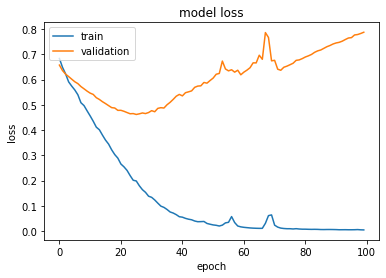

No Skill: AUC=0.500
CNN: AUC=0.866


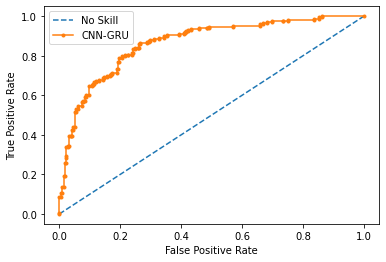

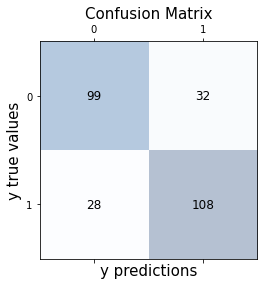

No Skill: AUC=0.500
CNN: AUC=0.845


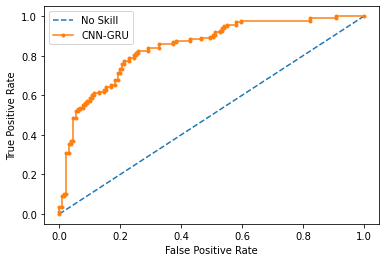

specificity: 0.7557 sensitivity: 0.7941 f1 score: 0.7826
Test accuracy: (0.4952162206172943, 0.7752808928489685)
16 & 0.1 & 0.0001 & 100 & 0.1732 & 0.9691 & 0.462 & 0.7955
----------------
Model: , hidden_layers: 16 , dropout: 0.25 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7582 - accuracy: 0.4794
Epoch 00001: val_loss improved from inf to 0.71560, saving model to video_classifier
34/34 [==============================] - 17s 405ms/step - loss: 0.7582 - accuracy: 0.4794 - val_loss: 0.7156 - val_accuracy: 0.4989
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.5721
Epoch 00002: val_loss improved from 0.71560 to 0.66156, saving model to video_classifier
34/34 [==============================] - 12s 352ms/step - loss: 0.6812 - accuracy: 0.5721 - val_loss: 0.6616 - val_accuracy: 0.6180
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6318 - accuracy: 0.6517
Epoch 0000

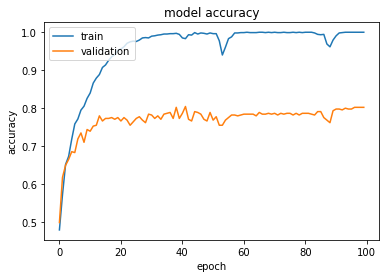

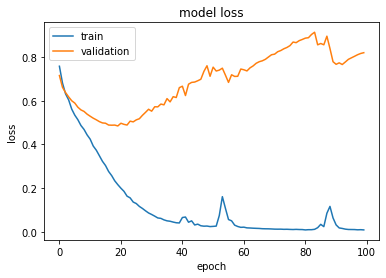

No Skill: AUC=0.500
CNN: AUC=0.852


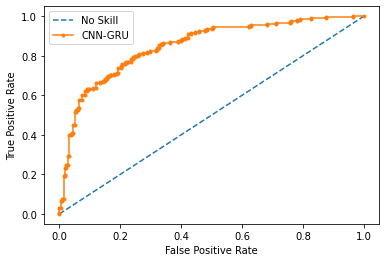

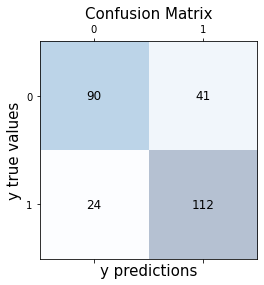

No Skill: AUC=0.500
CNN: AUC=0.837


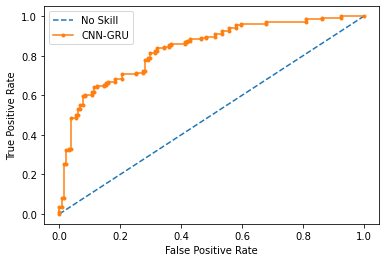

specificity: 0.687 sensitivity: 0.8235 f1 score: 0.7751
Test accuracy: (0.5159053206443787, 0.7565543055534363)
16 & 0.25 & 0.0001 & 100 & 0.1881 & 0.9672 & 0.4848 & 0.7753
----------------
Model: , hidden_layers: 16 , dropout: 0.5 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7231 - accuracy: 0.5384
Epoch 00001: val_loss improved from inf to 0.66566, saving model to video_classifier
34/34 [==============================] - 17s 412ms/step - loss: 0.7231 - accuracy: 0.5384 - val_loss: 0.6657 - val_accuracy: 0.5865
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.5740
Epoch 00002: val_loss improved from 0.66566 to 0.65031, saving model to video_classifier
34/34 [==============================] - 12s 353ms/step - loss: 0.6816 - accuracy: 0.5740 - val_loss: 0.6503 - val_accuracy: 0.6067
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.5908
Epoch 0000

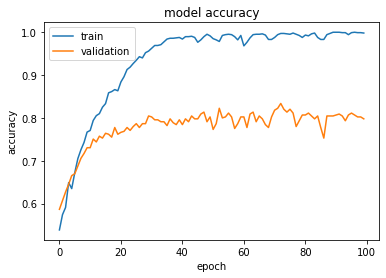

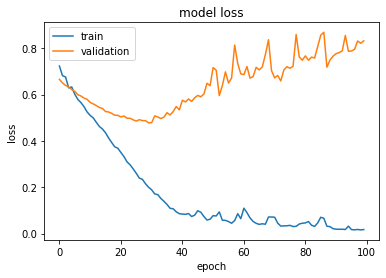

No Skill: AUC=0.500
CNN: AUC=0.856


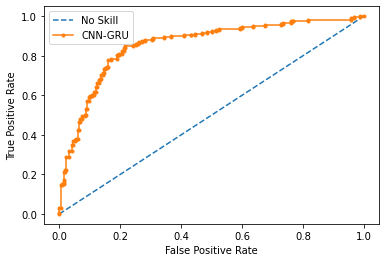

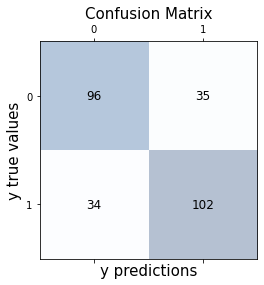

No Skill: AUC=0.500
CNN: AUC=0.820


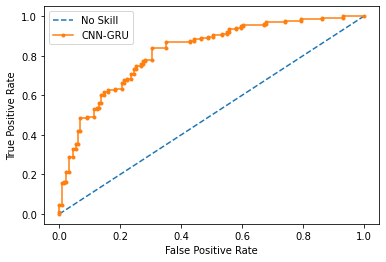

specificity: 0.7328 sensitivity: 0.75 f1 score: 0.7473
Test accuracy: (0.5496692061424255, 0.7415730357170105)
16 & 0.5 & 0.0001 & 100 & 0.1599 & 0.9738 & 0.4777 & 0.8045
----------------
Model: , hidden_layers: 32 , dropout: 0.1 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.6460 - accuracy: 0.6236
Epoch 00001: val_loss improved from inf to 0.61250, saving model to video_classifier
34/34 [==============================] - 25s 436ms/step - loss: 0.6460 - accuracy: 0.6236 - val_loss: 0.6125 - val_accuracy: 0.6742
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.5689 - accuracy: 0.7116
Epoch 00002: val_loss did not improve from 0.61250
34/34 [==============================] - 14s 399ms/step - loss: 0.5689 - accuracy: 0.7116 - val_loss: 0.6194 - val_accuracy: 0.6382
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.7444
Epoch 00003: val_loss improved from 0.61250 to 0.56

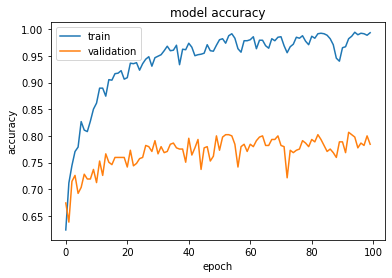

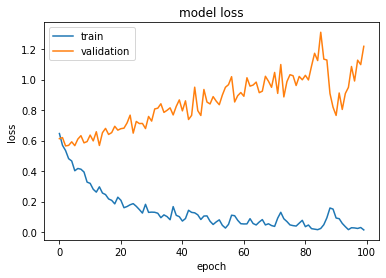

No Skill: AUC=0.500
CNN: AUC=0.781


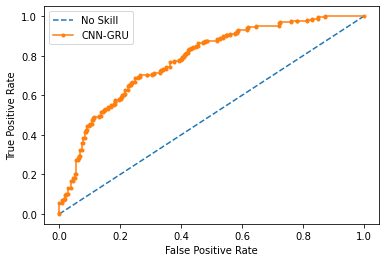

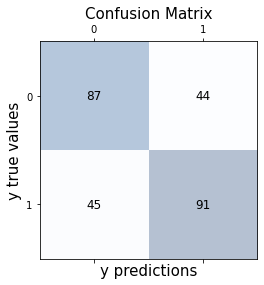

No Skill: AUC=0.500
CNN: AUC=0.730


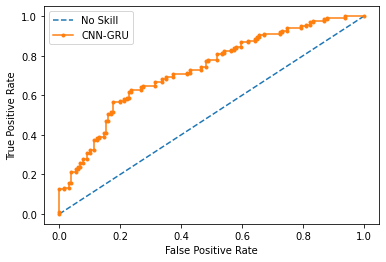

specificity: 0.6641 sensitivity: 0.6691 f1 score: 0.6716
Test accuracy: (0.6159598231315613, 0.6666666865348816)
32 & 0.1 & 0.001 & 100 & 0.4644 & 0.7893 & 0.5649 & 0.7146
----------------
Model: , hidden_layers: 32 , dropout: 0.25 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.5908
Epoch 00001: val_loss improved from inf to 0.62166, saving model to video_classifier
34/34 [==============================] - 25s 457ms/step - loss: 0.6765 - accuracy: 0.5908 - val_loss: 0.6217 - val_accuracy: 0.6652
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.5989 - accuracy: 0.6891
Epoch 00002: val_loss improved from 0.62166 to 0.58906, saving model to video_classifier
34/34 [==============================] - 13s 381ms/step - loss: 0.5989 - accuracy: 0.6891 - val_loss: 0.5891 - val_accuracy: 0.7056
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.5490 - accuracy: 0.7266
Epoch 00003

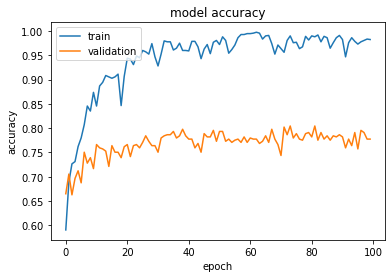

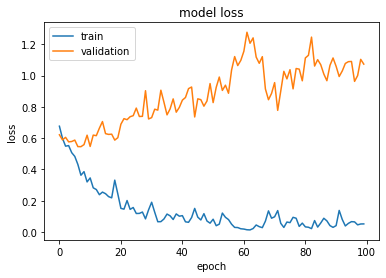

No Skill: AUC=0.500
CNN: AUC=0.816


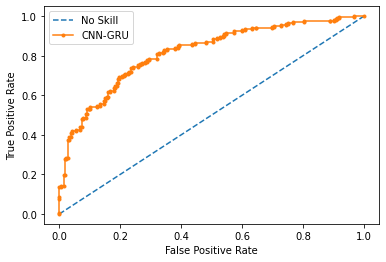

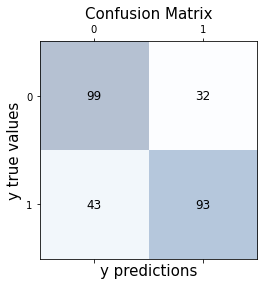

No Skill: AUC=0.500
CNN: AUC=0.798


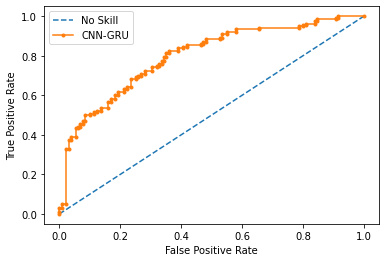

specificity: 0.7557 sensitivity: 0.6838 f1 score: 0.7126
Test accuracy: (0.5665445923805237, 0.7191011309623718)
32 & 0.25 & 0.001 & 100 & 0.3364 & 0.867 & 0.5457 & 0.7281
----------------
Model: , hidden_layers: 32 , dropout: 0.5 , learning rate: 0.001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7441 - accuracy: 0.5506
Epoch 00001: val_loss improved from inf to 0.64548, saving model to video_classifier
34/34 [==============================] - 18s 426ms/step - loss: 0.7441 - accuracy: 0.5506 - val_loss: 0.6455 - val_accuracy: 0.6270
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6670 - accuracy: 0.5936
Epoch 00002: val_loss improved from 0.64548 to 0.63072, saving model to video_classifier
34/34 [==============================] - 14s 399ms/step - loss: 0.6670 - accuracy: 0.5936 - val_loss: 0.6307 - val_accuracy: 0.6674
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6040 - accuracy: 0.6648
Epoch 00003:

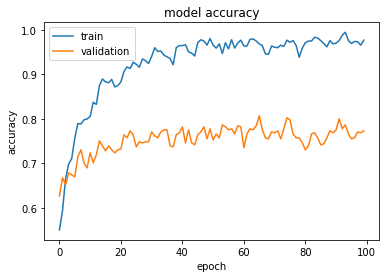

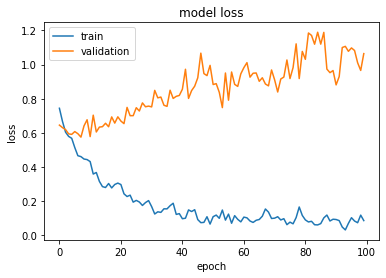

No Skill: AUC=0.500
CNN: AUC=0.785


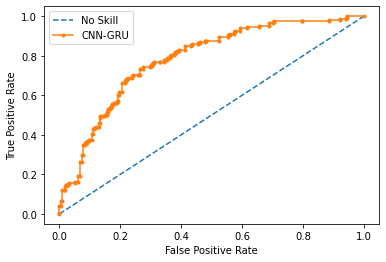

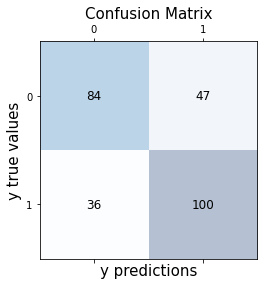

No Skill: AUC=0.500
CNN: AUC=0.762


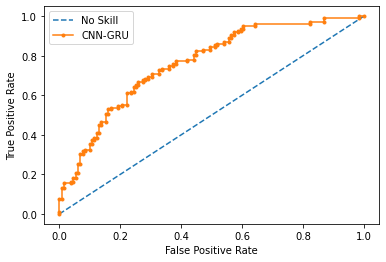

specificity: 0.6412 sensitivity: 0.7353 f1 score: 0.7067
Test accuracy: (0.608827531337738, 0.6891385912895203)
32 & 0.5 & 0.001 & 100 & 0.4069 & 0.823 & 0.5751 & 0.7303
----------------
Model: , hidden_layers: 32 , dropout: 0.1 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7100 - accuracy: 0.5262
Epoch 00001: val_loss improved from inf to 0.64702, saving model to video_classifier
34/34 [==============================] - 19s 448ms/step - loss: 0.7100 - accuracy: 0.5262 - val_loss: 0.6470 - val_accuracy: 0.6360
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6077 - accuracy: 0.6826
Epoch 00002: val_loss improved from 0.64702 to 0.61175, saving model to video_classifier
34/34 [==============================] - 14s 406ms/step - loss: 0.6077 - accuracy: 0.6826 - val_loss: 0.6117 - val_accuracy: 0.6809
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.5632 - accuracy: 0.7228
Epoch 00003: 

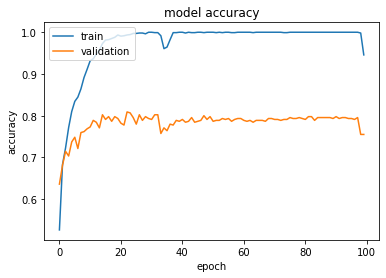

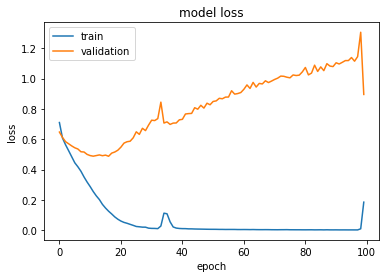

No Skill: AUC=0.500
CNN: AUC=0.861


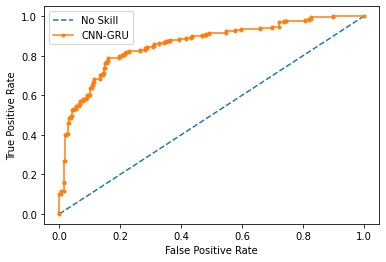

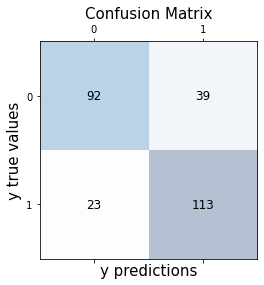

No Skill: AUC=0.500
CNN: AUC=0.869


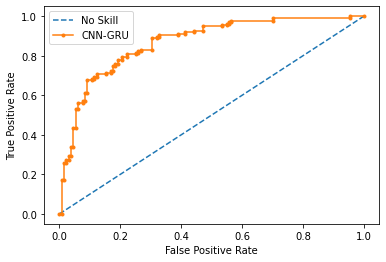

specificity: 0.7023 sensitivity: 0.8309 f1 score: 0.7847
Test accuracy: (0.4703329801559448, 0.7677902579307556)
32 & 0.1 & 0.0001 & 100 & 0.1036 & 0.9888 & 0.4875 & 0.7978
----------------
Model: , hidden_layers: 32 , dropout: 0.25 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.5674
Epoch 00001: val_loss improved from inf to 0.63738, saving model to video_classifier
34/34 [==============================] - 21s 418ms/step - loss: 0.6885 - accuracy: 0.5674 - val_loss: 0.6374 - val_accuracy: 0.6090
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6022 - accuracy: 0.6723
Epoch 00002: val_loss improved from 0.63738 to 0.60094, saving model to video_classifier
34/34 [==============================] - 14s 404ms/step - loss: 0.6022 - accuracy: 0.6723 - val_loss: 0.6009 - val_accuracy: 0.6719
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.7219
Epoch 000

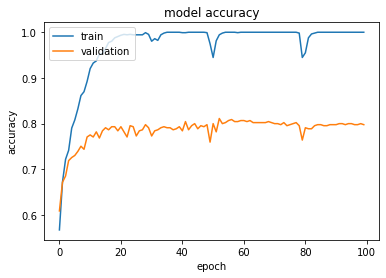

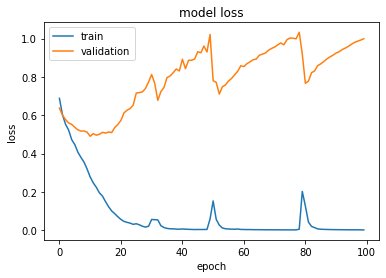

No Skill: AUC=0.500
CNN: AUC=0.849


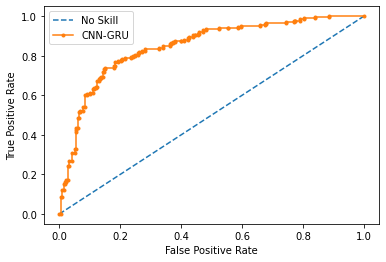

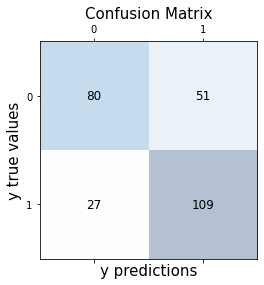

No Skill: AUC=0.500
CNN: AUC=0.802


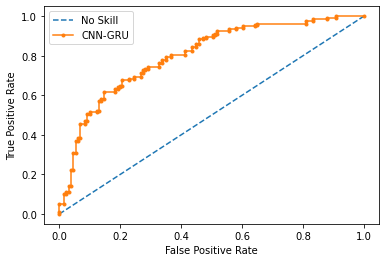

specificity: 0.6107 sensitivity: 0.8015 f1 score: 0.7365
Test accuracy: (0.5515804886817932, 0.7078651785850525)
32 & 0.25 & 0.0001 & 100 & 0.2434 & 0.9457 & 0.4905 & 0.7753
----------------
Model: , hidden_layers: 32 , dropout: 0.5 , learning rate: 0.0001 epochs 100
Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 0.7423 - accuracy: 0.5365
Epoch 00001: val_loss improved from inf to 0.66603, saving model to video_classifier
34/34 [==============================] - 23s 531ms/step - loss: 0.7423 - accuracy: 0.5365 - val_loss: 0.6660 - val_accuracy: 0.5888
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.6096
Epoch 00002: val_loss improved from 0.66603 to 0.62030, saving model to video_classifier
34/34 [==============================] - 13s 395ms/step - loss: 0.6784 - accuracy: 0.6096 - val_loss: 0.6203 - val_accuracy: 0.6652
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.6156 - accuracy: 0.6760
Epoch 000

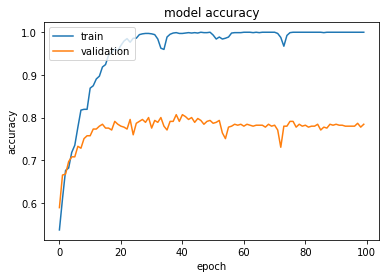

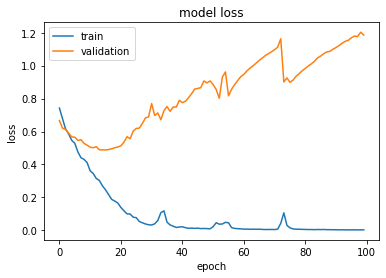

No Skill: AUC=0.500
CNN: AUC=0.850


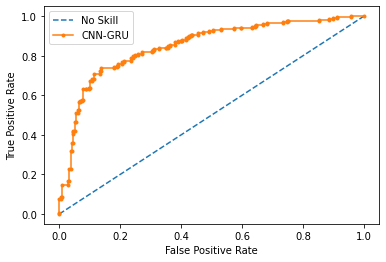

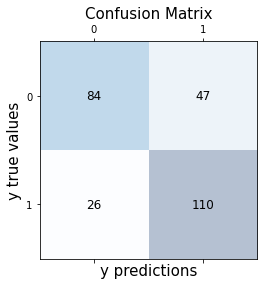

No Skill: AUC=0.500
CNN: AUC=0.812


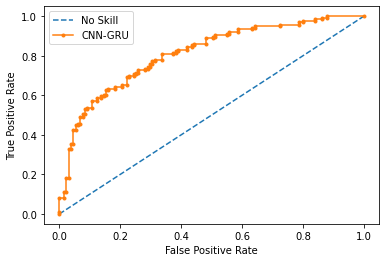

specificity: 0.6412 sensitivity: 0.8088 f1 score: 0.7509
Test accuracy: (0.5517082214355469, 0.7265917658805847)
32 & 0.5 & 0.0001 & 100 & 0.1921 & 0.9607 & 0.4878 & 0.7753


In [73]:
import os
os.chdir("C:/Users/u526074")

epochs = [50, 100]
hidden = [8,16,32]
lr = [0.001, 0.0001]
dropout = [0.1, 0.25, 0.5]
for e in epochs:
    for h in hidden:
        for l in lr:
            for d in dropout:
                frame_features_input = keras.Input((226, 2048))
                x = keras.layers.GRU(h, return_sequences=True)(
                frame_features_input
                    )
                x = keras.layers.GRU(h)(x)
                x = keras.layers.Dropout(d)(x)
                output = keras.layers.Dense(1, activation="sigmoid")(x)
                rnn_model_1 = keras.Model(frame_features_input, output)
                rnn_model_1.compile(
                loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=l), metrics=["accuracy"]
    )
                print("----------------")
                print("Model:", ",", "hidden_layers:", h,",", "dropout:", d, ",", "learning rate:",l, "epochs", e)
                filepath = "video_classifier"
                checkpoint = keras.callbacks.ModelCheckpoint(
                filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

                history = rnn_model_1.fit(
                X_trainn,
                y_trainn,
                validation_data = (X_vall, y_vall),
                epochs=e,
                callbacks=[checkpoint],  
    )
                
                rnn_model_1.load_weights(filepath)
                test_loss, test_accuracy = rnn_model_1.evaluate(X_testt, y_testt)
                plt.plot(history.history['accuracy'])
                plt.plot(history.history['val_accuracy'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'validation'], loc='upper left')
                plt.show()

                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'validation'], loc='upper left')
                plt.show()

                roccurve(y_vall, X_vall)

                y_pred = rnn_model_1.predict(X_testt)
                y_predx = []
                for i in y_pred:
                    if i >= 0.5:
                        y_predx.append(1)
                    else: y_predx.append(0)
                TN, FP, FN, TP = confusion_matrix(y_true = y_testt, y_pred = y_predx ).ravel()
                cm = confusion_matrix
                (y_testt, y_predx)

    
                fig, ax = plt.subplots(figsize=(4, 4))
                ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
                for i in range(cm.shape[0]):
                    for j in range(cm.shape[1]):
                        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
                
 
                plt.xlabel('y predictions', fontsize=15)
                plt.ylabel('y true values', fontsize=15)
                plt.title('Confusion Matrix', fontsize=15)
                plt.show()
                sensitivity = TP/(TP + FN)
                specificity = TN/(TN + FP)
                f1 = f1_score(y_testt, y_predx)
                roccurve(y_testt, X_testt)
                print("specificity:", round(specificity,4), "sensitivity:", round(sensitivity,4), "f1 score:", round(f1,4))
                print(f"Test accuracy: {test_loss, test_accuracy}")
                print(h, "&", d, "&", l, "&", e)

